# Streamflow Data Modeling



## Streamflow Measurement

Streamflow is measured by a variety of gaging technologies.  

- Continuous record (usually stage, then rated to produce discharge)
   - Located at control section if possible

- Crest-Stage (captures peak stage)
   - Uses slope-area to estimate discharge
   - Post-event site visit required to survey debris-line as independent check of estimate

**Continuous gages** use some kind of stilling well, and transducers to measure stage and send to satellite. During visits, a nearby staff gage is read to independently validate the transducer readings

![](continuousgage.png)

**Crest-Stage** gagues usually consist of a vertical pipe with holes in bottom – becomes a stilling well.
Inside a staff gage and small amount of cork “flour” records water surface elevation.
- A hydrographer visits site routinely (and after major events) and records cork elevation and re-sets gage.
- The elevations are marked on a staff inside the pipe with pencil (and dated)
- Slope area method between several nearby pipes is used to estimate discharge

![](creststagegage.png)

### Slope Area Method

Application of Manning’s equation, using the slope of the water surface as the friction slope, and the stage geometry at measured cross sections.

$$Q=\frac{1.49}{n}~A~R^{2/3}~S^{1/2}$$

Recall the factor 1.49 is for US Customary units, 1.0 is used if terms are expressed in SI units.

- [See pp. 33-39 CMM for explaination of Manning’s equation](http://54.243.252.9/ce-3354-webroot/3-Readings/CMM1988/)
- [See 7-31 TxDOT HDM for a description of slope-area (slope-conveyance) method](http://54.243.252.9/ce-3354-webroot/3-Readings/TXDOT-HYDM-2014/txdot-hdm-2014.pdf)

## Streamflow Data

Data sources for streamflow include:
- USGS NWIS (Website)
- IBWC
- Older “paper-based” records
- Local gage networks

Illustrative example using USGS NWIS

- Navigate to landing page for state of interest

![](query-nwis.png)


- Locate site of interest, or something stupid close

![](nwis-buffalo.png)

- Download desired record(s)

![](nwis-buffalo2.png)

- Typical file structure 

![](nwis-buffalo3.png)

## Watershed Characteristics

One tool in applied hydrology is to relate measurable watershed properties to streamflow discharge.  

What characteristics influence runoff?
- Where you are
- How large an area
- Gradient

![](devilsriver.png)

More detailed list might include:
- Width, shape
- Elevation: minimum, maximum + slope
- Roughness: Channels, overbanks
- Geology and soils
- Climate
- Vegetation
- Land use, including urbanization and imperviousness
- Controls: Dams, gates, diversions, channel rectification

This is part of the motivation for learning how to delineate a watershed.

Supporting data sources include:
- USGS quadrangle maps
- Aerial photos
- Satellite imagery
- NRCS soil surveys
- Field surveys
- Previous investigations

![](nrcs-soilsmap.png)


## Regional Regression Equations

Where sufficient data exist, one technique for gross estimates of streamflow based largely on watershed area, rainfall input, and location are regional regression equations.  These exist in some fashion for each state in the USA, and most terrortories (Puerto Rico, Guam ...).  They probably exist for many other countries, and are all obtained in a similar fashion.

The equations are constructed by first fitting an appropriate probability distribution to observations at a gaged location (station flood frequency). Then the station flood frequency curves are used as surrogate observations (at a specified AEP) to relate discharge to select geomorphic variables:

$$(\bar Q_{AEP} -\beta_0 - \beta_1 A - \beta_2 S - \beta_3 MAP \dots)^2= \bar \epsilon$$

The “betas” are obtained by trying to make “epsilon” small, the AREA, SLOPE, and other watershed characteristics are the explainatory variables.

The resulting equations are typically expressed in a power-law form (rather that the linear combination above) for actual application

$$Q_{AEP,\text{Estimate}} = \beta_0 (\text{AREA})^{\beta_1} (\text{SLOPE})^{\beta_2} (\text{MAP})^{\beta_3}$$

For example in Texas the following guidance is found in Chapter 4 of the Texas Hydraulics Manual:

![](THMregression.png)

The actual equations in current use are

![](RegressionEquations.png)

Two needed input values are the mean annual precipitation (MAP) and the Omega-EM factor both of which are mapped and available on the almighty internet

- [Texas Mean Annual Precipitation](http://onlinemanuals.txdot.gov/txdotmanuals/hyd/images/Fig4-6.png)
- [Texas Omega-EM Map](http://onlinemanuals.txdot.gov/txdotmanuals/hyd/OmegaEM_black_cropped.pdf)

Using the table above and the known equation structure it is fairly straightforward to create a tool for routine use in either a spreadsheet form or in python

- [Texas Regression Equation Spreadsheet](http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson05/TexasRegionalRegressionTool.xlsx)
- [On-Line Texas Regression Equation Tool](http://54.243.252.9/toolbox/hydrology/TXRegression/TXRegression.html)

Illustrative example for the Hardin Branch location (near Eden Texas).  

Apply the Regression Equations for the Hardin Branch Watershed – provide a comparative estimate to help guide the project

- AREA = 17 sq. mi.
- MAP = 23 inches/year
- OmegaEM = 0.345
- Slope = 0.0048


Below is result using the spreadsheet tool 
![](texasregional.png)

And the on-line web interface
![](texasregionalonline1.png)

and the on-line results
![](texasregionalonline2.png)

## Frequency Analysis (Background)

Frequency analysis is a kind of probability estimation modeling exercise

### Probability Estimation Modeling

Probability estimation modeling is the use of probability distributions (population data models) to model or explain behavior in observed (sample data) values.  Once a particular distribution is selected, then the concept of risk (probability) can be explored for events of varying magnitudes.

Two important “extremes” in engineering:

- Uncommon (rare) events (floods, nuclear plant explosions, etc.)

- Common, almost predictable events (routine discharges, traffic accidents at a dangerous intersection, network failure on a due date, etc.)

The probability distribution is just a model of the data, like a trend line for deterministic behavior; different distributions have different shapes, and domains and can explain certain types of observations better than others.

Some Useful Distributions (data models) include:

- Normal
- LogNormal
- Gamma
- Weibull
- Extreme Value (Gumbell)
- Beta

There are many more; they all have the common property that they integrate to unity on the domain $-\infty~to ~ \infty$.  

The probability distributions (models) are often expressed as a density function or a cumulative distribution function. 

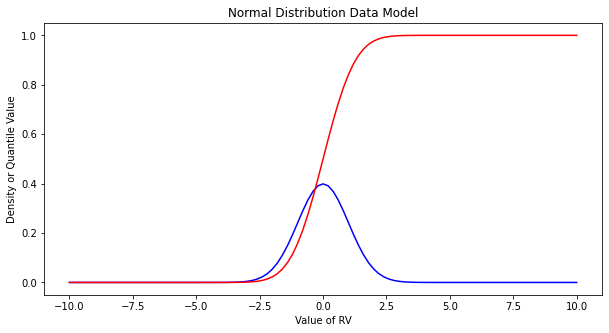

In [1]:
import math

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

# Standard Normal

mu = 0
sigma = 1

x = []
ypdf = []
ycdf = []

xlow = -10
xhigh = 10
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdensity(xlow + i*xstep,mu,sigma)
    ypdf.append(yvalue)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)  

import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(x, ypdf, color ='blue') 
matplotlib.pyplot.plot(x, ycdf, color ='red') 
matplotlib.pyplot.xlabel("Value of RV") 
matplotlib.pyplot.ylabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

### Exceedence Probability 

The purpose of distributions is to model data and allow us to estimate an answer to the question, what is the probability that we will observe a value of the random variable less than or equal to some sentinel value.  A common way to plot the quantile function is with accumulated probability on the horizontal axis, and random variable value on the vertical axis.
Consider the figure below;

![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/exceedence.png)

The RV Value is about 50,000 indicated by the horizontal magenta line.  
The blue curve is some data model, for instance one of our distributions below.
The accumulated probability value at 50,000 is 0.1 or roughly 10% chance, but we also have to stipulate whether we are interested in less than or greater than.  

In the figure shown, $P(x <= 50,000)~ =~1.00~-~0.1~= 0.9~or~90\%$ and is a non-exceedence probability. In words we would state 
"The probability of observing a value less than or equal to 50,000 is 90%" the other side of the vertical line is the exceedence probability; in the figure $P(x > 50,000)~=~0.1~or~10\%$.  In words we would state "The probability of observing a value equal to or greater than 50,000 is 10%."  In risk analysis the sense of the probability is easily confusing, so when you can - make a plot.  Another way to look at the situation is to simply realize that the blue curve is the quantile function $F(X)$ with $X$ plotted on the vertical axis, and $F(X)$ plotted on the horizontal axis.

Now lets put these ideas to use.  We will sample from the population of integers from 0 to 100, with replacement.  Any single pull from the population is equally likely. Lets take 25 samples (about 1/4 of the total population - usually we dont know the size of the population).

In [2]:
import numpy

population = []
for i in range(0,101,1):
    population.append(i)
    
sample = numpy.random.choice(population,25)

In [3]:
# lets get some statistics
sample_mean = sample.mean()
sample_variance = sample.std()**2

In [4]:
# sort the sample in place!
sample.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely
weibull_pp = []
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))

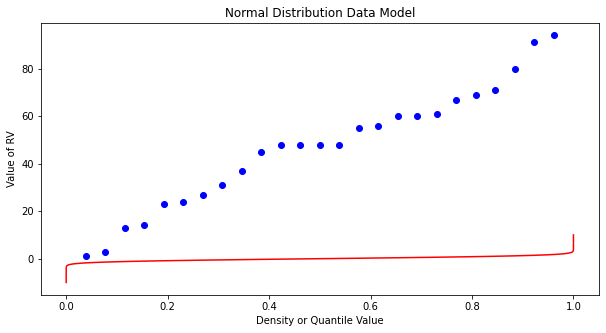

In [5]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

What a horrible plot, but lets now use the sample statistics to "fit" the data model (red) to the observations (blue). Notice we have already rotated the axes so this plot and ones that follow are structured like the "Exceedence" plot above.

In [6]:
# Fitted Model

mu = sample_mean
sigma = math.sqrt(sample_variance)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

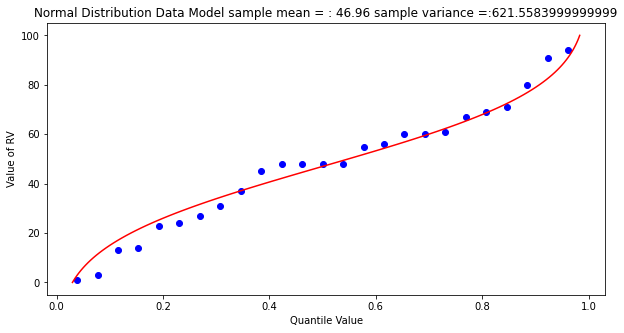

In [7]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample,  color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

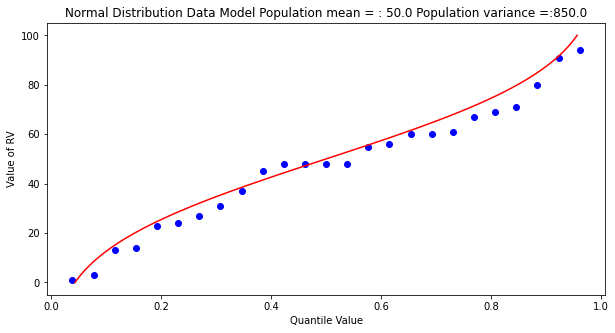

In [8]:
popmean = numpy.array(population).mean()
popvar = numpy.array(population).std()**2
# Fitted Model

mu = popmean
sigma = math.sqrt(popvar)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

    
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model Population mean = : " + str(popmean)+ " Population variance =:" + str(popvar)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Some observations are in order:

- The population is a uniformly distributed collection. 
- By random sampling, and keeping the sample size small, the sample distribution appears approximately normal.  

Real things of engineering interest are not always bounded as shown here, the choice of the Weibull plotting position is not arbitrary.  The blue dot scatterplot in practice is called the empirical distribution function, or empirical quantile function.   

Now we will apply these ideas to some realistic data.

### Beargrass Creek

The file [beargrass.txt](http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson05/beargrass.txt) contains annual peak flows for Beargrass Creek.  The year is a water year, so the peaks occur on different days in each year; thus it is not a time series. Let's examine the data and see how well a Normal distribution data model fits, then estimate from the distribution the peak magnitude with exceedence probability 0.01 (1%-chance that will observe a value equal to or greater).

In [9]:
import pandas
beargrass = pandas.read_csv('beargrass.txt')  #Reading a .csv file
beargrass.head()

,Year,Peak
0,1945,1810
1,1946,791
2,1947,839
3,1948,1750
4,1949,898



__Plotting Position:__ An empirical distribution, based on a random sample from some underlying distribution, is obtained by plotting an estimate of the exceedance (or cumulative) probability of the sample distribution against the sample value. <br>

The exceedance probability estimate for a particular sample value is a function of sample size and the rank of the particular sample. 
For exceedance probabilities, the sample values are ranked from largest to smallest. 

The general expression in common use for plotting position is $ P = \frac{m - b}{N + 1 -2b} $

where m is the ordered rank of a sample value, N is the sample size, and b is a constant between 0 and 1, depending on the plotting method.<br>

 Now we will just copy the code for generic normal distributions and modify to explore the data file (the miracle of cut-n-paste!)

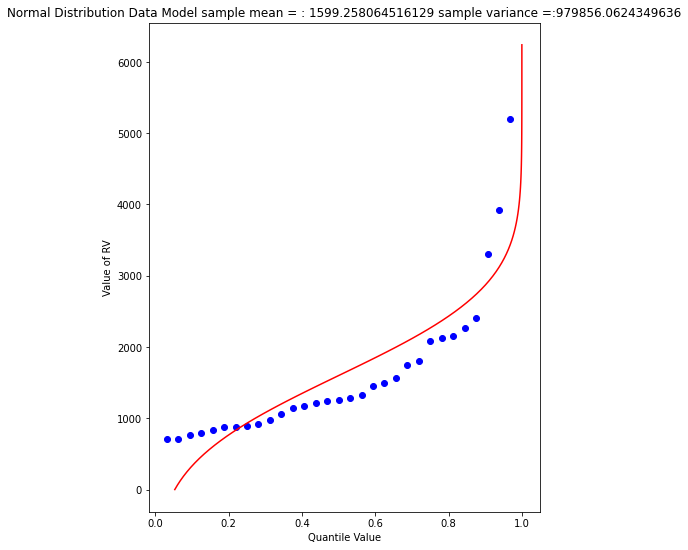

In [10]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [11]:
beargrass['Peak'].describe()

count      31.000000
mean     1599.258065
std      1006.239500
min       707.000000
25%       908.000000
50%      1250.000000
75%      1945.000000
max      5200.000000
Name: Peak, dtype: float64

A 1% chance exceedence is on the right side of the chart, it is the compliment of 99% non-exceedence, in terms of our quantile function we want to find the value $X$ that returns a quantile of 0.99.

In [12]:
myguess = 6000
print(mu,sigma)
print(normdist(myguess,mu,sigma))

1599.258064516129 989.8767915427474
0.9999956206542673


In [13]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 1599.258064516129
    sigma = 989.8767915427474
    quantile = 0.99999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))


5820.974479887303


So a peak discharge of 4000 or so is expected to be observed with 1% chance, notice we took the value from the fitted distribution, not the empirical set.  As an observation, the Normal model is not a very good data model for these observations.

### Log-Normal

Another data model we can try is log-normal, where we stipulate that the logarithms of the observations are normal.  The scripts are practically the same, but there is an inverse transformation required to recover original value scale.  Again we will use Beargrass creek.  

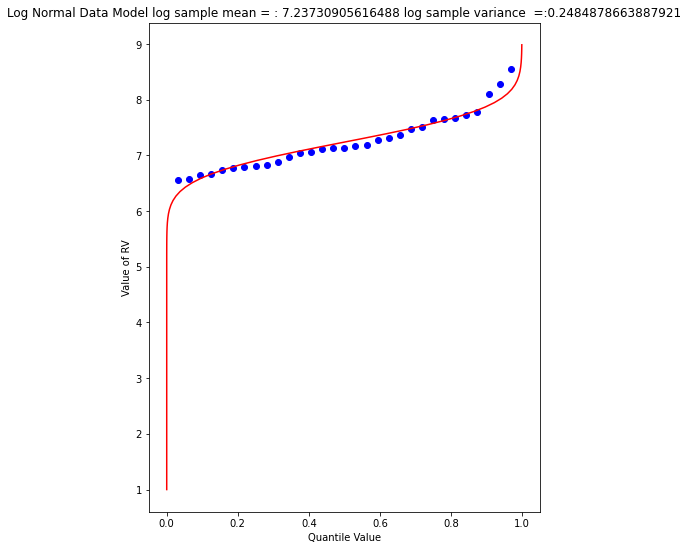

In [14]:
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

logsample = beargrass['Peak'].apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, logsample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model log sample mean = : " + str(sample_mean)+ " log sample variance  =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

The plot doesn't look too bad, but we are in log-space, which is hard to interpret, so we will transform back to arithmetic space 

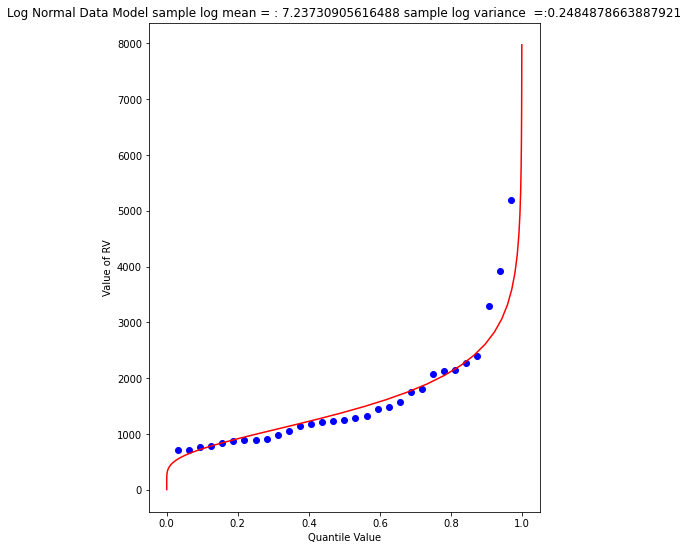

In [15]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

sample = beargrass['Peak'].tolist() # pull original list
sample.sort() # sort in place
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model sample log mean = : " + str((sample_mean))+ " sample log variance  =:" + str((sample_variance))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Visually a better data model, now lets determine the 1% chance value.

In [16]:
myguess = 4440
print(mu,sigma)
print(normdist(loggit(myguess),mu,sigma)) # mu, sigma already in log space - convert myguess

7.23730905616488 0.4984855728993489
0.9900772507418302


In [17]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 7.23730905616488
    sigma = 0.4984855728993489
    quantile = 0.99
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

4433.567789173262


Now we have a decent method, we should put stuff into functions to keep code concise, lets examine a couple more data models

### Gumbell (Double Exponential) Distribution

The Gumbell is also called the Extreme-Value Type I distribution, the density and quantile function are:

$$ \text{pdf(x)} = \frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ]$$

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ] dx} = exp [- exp (-\frac{(X-\alpha)}{\beta})] $$

The distribution has two parameters, $\alpha$ and $\beta$, which in some sense play the same role as mean and variance. Lets modify our scripts further to see how this data model performs on the Bearcreek data.

Of course we need a way to estimate the parameters, a good approximation can be obtained using:

$$ \alpha = \mu \cdot \frac{\sqrt{6}}{\pi} $$

and

$$ \beta = 0.45 \cdot \sigma $$

where $\mu$ and $\sigma^2$ are the sample mean and variance.

In [18]:
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

Now literally substitute into our prior code!

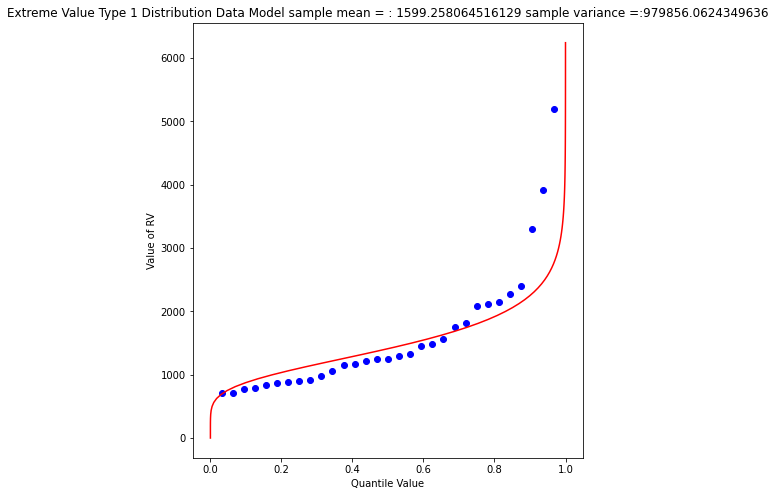

In [19]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

Again a so-so visual fit.
To find the 1% chance value

In [20]:
myguess = 3300
print(alpha_mom,beta_mom)
print(ev1dist(myguess,alpha_mom,beta_mom)) # 

1246.9363972503857 445.4445561942363
0.990087892543188


In [21]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    alpha = 1246.9363972503857
    beta = 445.4445561942363
    quantile = 0.99
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))

3296.0478279991366


### Gamma Distribution (as Pearson Type 3)

One last data model to consider is one that is specifically stipulated for use by federal agencies for probability estimation of extreme hydrologic events.  The data model ia called the Log-Pearson Type III distribution, its actually a specific case of a Gamma distrubution.  

This example we will dispense with tyring to build it in python primative, and just use a package - the density function is not all that hard, but the quantile function is elaborate.  

Learn more at http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/3-Readings/NumericalRecipesinF77.pdf (in particular around Page 276)

As usual, lets let Google do some work for us, using the search term "gamma quantile function; scipy" we get to this nice blog entry https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html which is a good start. 

A Pearson Type III data model has the following density function:

$$ f(x|\tau,\alpha,\beta) = \frac{(\frac{x-\tau}{\beta})^{\alpha -1}\cdot exp( - \frac{x-\tau}{\beta})}{|\beta| \Gamma(\alpha)}$$

If we make some substitutions:
$ \lambda = \frac{1}{\beta} ; \hat{x} = x -\tau $ then the density function is

$$ f(\hat{x}) = \frac{ 1}{\Gamma(\alpha)} (\lambda \hat{x})^{\alpha -1}\cdot exp( - \lambda \hat{x} )$$

which is now a one parameter Gamma density function just like the example in the link.

Reading a little from http://atomickitty.ddns.net/documents/university-courses/ce-5361-swhydrology/1-Lessons.src/Lesson22/AdditionalReading/Bulletin17C-tm4b5-draft-ACWI-17Jan2018.pdf we can relate the transformations to descriptive statistics (shown below without explaination) as:

$\mu = \text{sample mean}$,

$\sigma = \text{sample standard deviation}$, 

$\gamma = \text{sample skew coefficient} = (\frac{n}{\sigma^3(n-1)(n-2)})\sum_{i=1}^n(x_i - \mu)^3 $

$\alpha = \frac{4}{\gamma^2}$  

$\beta = sign(\gamma)\sqrt{\frac{\sigma^2}{\alpha}}$

$\tau = \mu - \alpha \cdot \beta$

So we have a bit of work to do.  The name of the functions in `scipy` we are interested in are `gamma.pdf(x,a)` and `gamma.cdf(x,a)`  So lets build a tool to generate a Log-Pearson Type III data model, then apply it to Beargrass Creek.  We will use a lot of glue here.

First load in dependencies, and define support functions we will need 

In [22]:
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp


Then the gamma distribution from scipy, modified for our type of inputs.

In [23]:
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

Then load in the data from the data frame, log transform and generate descriptive statistics.

In [24]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = beargrass['Peak'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = 3.0 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

Now generate plotting positions for the sample observations

In [25]:
plotting = weibull_pp(sample)

Now generate values for the data model (for plotting our red line "fit"), set limits to be a little beyond the sample range.

In [26]:
x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

Now reverse transform back to native scale, and plot the sample values vs plotting position in blue, and the data model in red

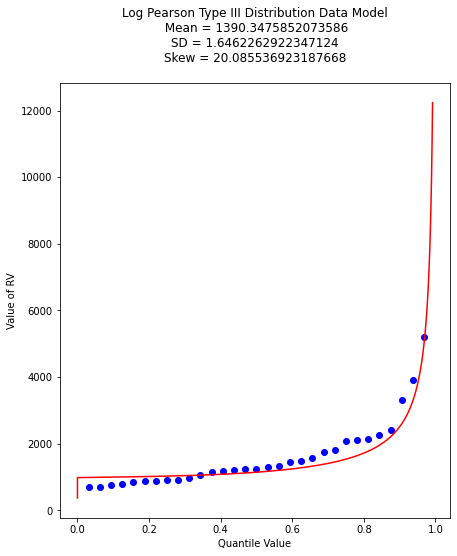

In [27]:
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

And as before lets find the value that retruns the 99% quantile - we will just use the newton method above.
First recover the required model parameters. Then we will paste these into the $f(x)$ function for the Newton's method.

In [28]:
print(sample_tau)
print(sample_alpha)
print(sample_beta)

6.904985340898647
0.4444444444444444
0.7477283593490234


In [29]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.9900
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  5000
print(newton(f, myguess))

5856.10913158364


Trust, but verify!

In [30]:
round(gammacdf(loggit(5856.109),sample_tau,sample_alpha,sample_beta),4)

0.9753

Now lets summarize our efforts regarding Beargrass Creek annual peaks and probabilities anticipated.

|Data Model|99% Peak Flow|Remarks|
|:---|:---|:---|
|Normal|3902|so-so visual fit|           
|Log-Normal|4433|better visual fit|            
|Gumbell|3296|better visual fit|            
|Log-Pearson III|5856|best (of the set) visual fit|

At this point, now we have to choose our model and then can investigate different questions.  So using LP3 as our favorite, lets now determine anticipated flow values for different probabilities (from the data model) - easy enought to just change the quantile value and rerun the newtons optimizer, for example:

|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |968| First Quartile Divider|           
|50% |1302| Median, and Second Quartile Divider|            
|75% |1860| 3rd Quartile Divider|            
|90% |2706| 10% chance of greater value|
|99% |5856| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|9420| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|11455| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

In [31]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.50
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  1000
print(newton(f, myguess))

1302.814639184079


## Flood Frequency Analysis (B17C)

Flood hydrology is typically studied using the annual peak streamflow data collected by the U.S. Geological Survey (USGS) at streamgages. Hydraulic design engineers need standard of practice guidance for various tasks involving the analysis and application peak streamflow information. Analyses of this information materially influences bridge design, operational safety of drainage infrastructure, flood-plain management, and other decisions affecting society.

Bulletin 17B was the standard of practice for decades, recently superceded by Bulletin [17C](https://pubs.usgs.gov/tm/04/b05/tm4b5.pdf).  These and similar tools relate certain statistical metrics (mean, variance, and skew) to a prescribed probability distribution function (Log-Pearson Type III) to extrapolate (predict) the magnitude of rare (low probability) events to inform engineering design.

Tasker and Stedinger (1986) developed a weighted least squares (WLS) procedure for estimating regional skewness coefficients based on sample skewness coefficients for the logarithms of annual peak-streamflow data. Their method of regional analysis of skewness estimators accounts for the precision of the skewness estimator for each streamgage, which depends on the length of record for each streamgage and the accuracy of an ordinary least squares (OLS) regional mean skewness. These methods automated much of B17B process and were incorporated into software used for streamgage analysis.  
Recent updates to B17B in terms of software improvements and different handling of gage statistics (in particular EMA) are incorporated into the current tool [B17C](https://pubs.usgs.gov/tm/04/b05/tm4b5.pdf)

*Summary*

- B17C is a report containing methods for estimating magnitudes of rare events
- The methods are incorporated into software products such as [PeakFQ 7.3](https://pubs.usgs.gov/tm/2006/tm4b4/tm4b4.pdf) and [HEC-SSP](https://www.hec.usace.army.mil/software/hec-ssp/)

### Illustrative Example using Beargrass creek

Demonstrate using Bearcreek as an example.  Beargrass creek is not a real site, therefore is not in the NWIS database, so we have to modify the file to be readable in PeakFQ.

A modified version is at [BearGrass-B17B.txt](http://54.243.252.9/ce-3354-webroot/ce3354book/lessons/lesson05/BearGrass-B17B.txt)

A fully provisioned Windows Implementation of B17C is located at:

- server_name: **kittyinthewindow.ddns.net**
- user_name: **texas-skew**
- passwd: **peakfq73$hare**

Users must access using Remote Desktop Protocol (Built into Windows, Apple Store has a free Mac application)

- [Video to Demo PeakFQ on Beargrass Creek (YouTube)](https://youtu.be/sm2-4AI6WU8)

In class access [Brady Creek](https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=08145000) (close to Hardin Creek)

## Flow Duration Curves

The [flow-duration curve](https://pubs.er.usgs.gov/publication/wsp1542A) is a cumulative frequency curve that shows the percent of **time** specified discharges were equaled or exceeded during a given period. 
It combines in one curve the flow characteristics of a stream throughout the range of discharge, without regard to the sequence of occurrence. If the period upon which the curve is based represents the long-term flow of a stream, the curve may be used to predict the distribution of future flows for water- power, water-supply, and pollution studies. 

[OSU Flow Duration Curve Mechanics](https://streamflow.engr.oregonstate.edu/analysis/flow/index.htm)

## References

1. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Bulletin 17B)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture07.pdf)

2. [Cleveland, T. G. (2017) *Engineering Hydrology Notes to Accompany CE 3354 (Bulletin 17B)*, Department of Civil, Environmental, and Construction Engineering, Whitacre College of Engineering.](http://54.243.252.9/ce-3354-webroot/1-Lectures-2017/Lecture08.pdf)

3. [Generalized Skew Update and Regional Study of Distribution Shape for Texas Flood Frequency Analyses](https://dataverse.tdl.org/dataset.xhtml?persistentId=doi:10.18738/T8/SVLCOQ)

4. Jamie Chan (2014) Learn Python in One Day and Learn It Well. LCF Publishing. Kindle Edition. http://www.learncodingfast.com/python

5. Grus, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media. Kindle Edition. (http://safaribooksonline.com)

6. Christian, B, and Griffiths Tom (2016) Algorithms to live by: The computer science of human decisions. Henry Holt and Company, ISBN 9781627790369 (hardcover)|ISBN 9781627790376 (electronic book)

7. https://www.amazon.com/Distributional-Statistics-Environment-Statistical-Computing/dp/1463508417
    
8. England, J.F. Jr., Cohn, T.A., Faber, B.A., Stedinger, J.R., Thomas Jr., W.O., Veilleux, A.G., Kiang, J.E., and Mason, R.R.Jr., 2018, Guidelines for Determining Flood Flow Frequency—Bulletin 17C: U.S. Geological Survey Techniques andMethods, book 4, chap. B5, 146 p., https://doi.org/10.3133/tm4B5

9. https://www.astroml.org/book_figures/chapter3/fig_gamma_distribution.html

10. https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html

11. https://www.inferentialthinking.com/chapters/15/Prediction.html